In [1]:
# My trip: end by 8/23/17 to be part of the dateset? 10 day trip....

# Import Dependencies

#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import os
from pylab import *

from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
# from datetime import time
# from datetime import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func#, MetaData
#from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
#from sqlalchemy import Column, Integer, String, Float

# import pymysql
# pymysql.install_as_MySQLdb()

today = date.today()
print(today)

now = datetime.now()
print(now.strftime('%m/%d/%y'))

d = now - timedelta(years=1)
print(d)



new_date = (now + relativedelta(years=1)).date()
print(new_date)

type(new_date)

print(new_date.strftime('%Y/%m/%d'))

## Database Setup

In [2]:
# Create an engine to the SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Check for tables
engine.table_names()

['measurements', 'stations']

In [4]:
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0490204841713224, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [5]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


## Reflect and query dates

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the table
Measurement = Base.classes.measurements
Station = Base.classes.stations

# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

In [8]:
# # Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# # and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# print(calc_temps('2012-02-28', '2012-03-05'))

In [9]:
#last_12 = session.query(Measurement).filter_by(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15")
#last_12 = session.query(Measurement).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15")

## WHY NOT WORKING?
#tobs_high = session.query(Measurement).filter_by(tobs == 80).all()

# id_print = session.query(Measurement).filter_by(id=5).count()
# print(id_print)


### WORKS
# thing = session.query(Measurement).filter_by(tobs = 80).count()
# print(thing)
# stuff = session.query(Measurement).filter(Measurement.tobs > 80).count()
# print(stuff)



#update_one = session.query(Garbage).filter(Garbage.id == 1).first()


## NOT YET
# target = session.query(Measurement.date).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15").count()
# print(target)

# attacks = session.query(Measurement) 
# for x in attacks:
#     print(x.tobs)

#last_12 = session.query(Measurement).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15")


#filter(func.strftime("%m", Dow.date) == "05")
#year_2017 = session.query(Sharks).filter_by(year=2017).count()
# for item in tobs_high:
#     print(item.tobs)
### END SOLUTION

In [10]:
# these = session.query(Measurement.tobs, Measurement.date).filter(Measurement.tobs > 80).all()
# print(these)

In [25]:
# Retrieve the last 12 months of precipitation data by finding the maximum date in the table and subtracting one year.
# Select average prcp value by date and date.

max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()

sel = [Measurement.date, func.avg(Measurement.prcp)]

prcp_twelve_months = session.query(*sel).\
    filter(Measurement.date >= (max_date - relativedelta(years=1))).\
    group_by(Measurement.date).all()
print(prcp_twelve_months)

[('2016-08-23', 0.39622882242208746), ('2016-08-24', 1.341943108136373), ('2016-08-25', 0.07714285714285715), ('2016-08-26', 0.016666666666666666), ('2016-08-27', 0.12499798711755201), ('2016-08-28', 0.5166666666666666), ('2016-08-29', 0.21765739385065888), ('2016-08-30', 0.011666666666666667), ('2016-08-31', 0.4806657277985901), ('2016-09-01', 0.015600292825768672), ('2016-09-02', 0.061223268100825456), ('2016-09-03', 0.254), ('2016-09-04', 0.276), ('2016-09-05', 0.08501313696780692), ('2016-09-06', 0.2131700806952204), ('2016-09-07', 0.3333333333333333), ('2016-09-08', 0.07480025099351602), ('2016-09-09', 0.16194310813637314), ('2016-09-10', 0.27999999999999997), ('2016-09-11', 0.25), ('2016-09-12', 0.2463800135128759), ('2016-09-13', 0.39622882242208746), ('2016-09-14', 2.04908596527923), ('2016-09-15', 0.7176573938506589), ('2016-09-16', 0.11714285714285715), ('2016-09-17', 0.13599999999999998), ('2016-09-18', 0.10600000000000001), ('2016-09-19', 0.07209429922716158), ('2016-09-20'

In [ ]:
# prcp12_dict = dict(prcp12_data)
# prcp12_df = pd.DataFrame.from_dict(prcp12_dict, orient='index', dtype=None)
# prcp12_df = prcp12_df.reset_index()
# prcp12_df.columns = ['date', 'prcp']
# prcp12_df = prcp12_df.set_index('date')
# prcp12_df

In [31]:
# Convert selected data to be loaded into a Pandas Dataframe

prcp_twelve_months_dict = dict(prcp_twelve_months)

prcp_twelve_months_df = pd.DataFrame.from_dict(prcp_twelve_months_dict, orient='index', dtype=None)

prcp_twelve_months_df = prcp_twelve_months_df.reset_index()
prcp_twelve_months_df.columns = ['date', 'prcp']
prcp_twelve_months_df = prcp_twelve_months_df.set_index('date')
#prcp_twelve_months_df

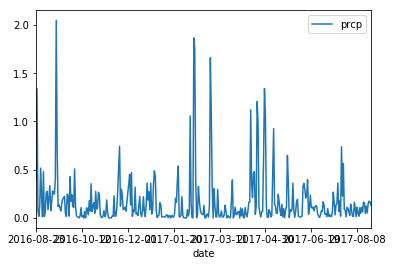

In [35]:
# Plot the precipitation data indexed by date

prcp_twelve_months_df.plot()
plt.show()

In [12]:
# # Retrieve the last 12 months of precipitation data.
# # Select only the date and prcp values.

# max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
# max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()

# # one_year = (max_date - relativedelta(years=1))


# # sel = [Measurement.date, Measurement.prcp]

# sel = [Measurement.date, 
#        func.avg(Measurement.prcp)]

# # test2 = session.query(*sel).\
# #     filter(Measurement.date >= one_year).all()
# # print(test2)


# # YES!!
# # test3 = session.query(*sel).\
# #     filter(Measurement.date >= (max_date - relativedelta(years=1))).all()
# # print(test3)

# test4 = session.query(*sel).\
#     filter(Measurement.date >= (max_date - relativedelta(years=1))).\
#     group_by(Measurement.date).all()
# print(test4)



In [13]:


# # sel = [Measurement.date, 
# #        func.avg(Measurement.prcp)]

# sel = [Measurement.date, Measurement.prcp]

# # precipitation_12_months = session.query(*sel).\
# #     filter(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15").all()
    
# precipitation_sample = session.query(*sel).\
#     filter(func.strftime("%YY/%m/%d", Measurement.date) >= "2015/10/15").all()

# # precipitation_12_months = session.query(*sel).\
# #     filter(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15").\
# #     group_by(Measurement.date).\
# #     order_by(Measurement.date).all()

# print(precipitation_sample)

In [14]:
# max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
# print(max_date)

In [15]:
# #dates_list = [dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in dates]

# # print(max_date[0])
# # print(max_date[0][0])

# #type(max_date[0][0])

# jessica = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# # type(jessica)
# print(jessica)

# # james = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# # # type(james)
# # print(james)

# # datetime.strptime(max_date[0], "%Y/%m/%d")

# # james = datetime.strptime(max_date[0], "%Y/%m/%d")
# # print(james)
# # type(james)
# #max_date = datetime(max_date)

In [16]:
# max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# #

In [17]:
#attacks = session.query(Sharks) 
# for attack in attacks:
#     print(attack.location)

In [18]:
# for x in precipitation_12_months:
#     print(x.prcp)

In [19]:
# if '2017-10-1' <= '2017-9-31':
#     print ("True")

In [20]:
# type(max_date)

In [21]:
# print(max_date)

In [22]:
# # new_date = (now + relativedelta(years=1)).date()
# # print(new_date)

# one_year = (max_date - relativedelta(years=1))
# print(one_year)

In [23]:
# ### THIS ISNT WORKING - RETURNS BACK TO JAN 2016

# test = session.query(*sel).\
#     filter(func.strftime("%Y/%m/%d", Measurement.date) >= one_year).all()
    
# # precip = session.query(*sel).\
# #     filter(datetime.strptime("%Y/%m/%d", Measurement.date) >= one_year)
  
    
# # test = session.query(*sel).\
# #     filter(func.strftime("%YY/%m/%d", Measurement.date) >= "2016/08/15").all()
    
# print(test)

In [24]:
# test2 = session.query(*sel).\
#     filter(Measurement.date >= one_year).all()
# print(test2)